## Credit Card Fraud Detection

In [1]:
# importing important modules
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [2]:
# read in csv datafile
from google.colab import drive
drive.mount("/content/drive")

data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration


In [3]:
data.head()
# class label 0 or 1 if fraudulent

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Pre-Processing

In [4]:
from sklearn.preprocessing import StandardScaler

# normalize amount col and remove original amount & time column
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)
data = data.drop(['Time'], axis=1)

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
# make X every column except Class and make y Class column
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [8]:
# transform data into numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Sequential layer model means one layer will come after the other
# using relu activation, except last which will use sigmoid since this is a binary classification problem
# units is num of nodes
model = Sequential([
    Dense(units=16,input_dim=29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1,activation='sigmoid'),

])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

## Training

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0080 - accuracy: 0.9991
Epoch 2/5
13291/13291 [==============================] - 26s 2ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 26s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 24s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 25s 2ms/step - loss: 0.0033 - accuracy: 0.9993


In [12]:
score = model.evaluate(X_test, y_test)
print(score) # displays the accuracy of our predictions on the dataset

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0053 - accuracy: 0.9994
[0.005343734752386808, 0.9993914365768433]


[[85276    20]
 [   32   115]]


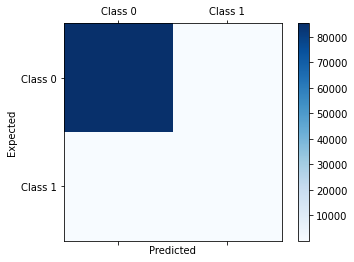

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

# create confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_pred.round())
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [14]:
# plot_confusion_matrix(X_test,y_test.round(), labels=[0,1])
# plt.show()

[[284253     62]
 [    99    393]]


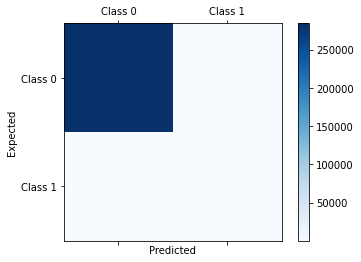

In [15]:
# entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
my_confusion_matrix = confusion_matrix(y_expected, y_pred.round())
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

#building random forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train.ravel())

y_pred = random_forest.predict(X_test)

In [17]:
# calculate score
random_forest.score(X_test, y_test)

0.9995435553526912

confusion matrix with test dataset
[[85290     6]
 [   33   114]]


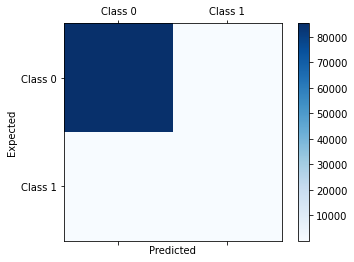


confusion matrix with entire dataset
[[284309      6]
 [    34    458]]


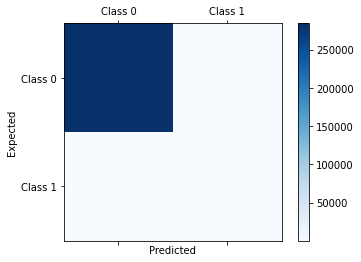

In [18]:
# confusion matrix w/ test dataset
my_confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(f'confusion matrix with test dataset')
print(my_confusion_matrix1)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix1, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

print()

# confusion matrix w/ full dataset
y_pred = random_forest.predict(X)
my_confusion_matrix = confusion_matrix(y, y_pred.round())
print(f'confusion matrix with entire dataset')
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

#building model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train.ravel())

y_pred = decision_tree.predict(X_test)

In [20]:
decision_tree.score(X_test, y_test)

0.9992392589211521

In [21]:
y_pred = decision_tree.predict(X)
y_expected = pd.DataFrame(y)

[[284286     29]
 [    36    456]]


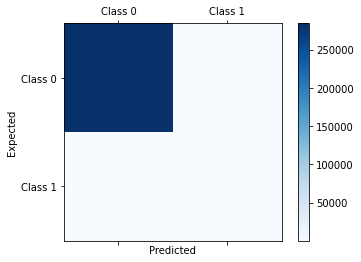

In [22]:
my_confusion_matrix = confusion_matrix(y_expected,y_pred.round())
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Undersampling

In [23]:
# find fraud transaction indices
fraud_indices = np.array(data[data.Class==1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [24]:
# pick non-fraud transaction indices
normal_indices = np.array(data[data.Class==0].index)
random_normal_indices = np.random.choice(normal_indices,number_records_fraud, replace=False)

# convert to np array
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [25]:
# create array of both sample sets
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [26]:
# select corresponding rows
under_sample_data = data.iloc[under_sample_indices,:]

# split data into X and y
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [28]:
# transform data into numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
# verify model hasnt changed
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [30]:
# train model again, notice faster time since less data used
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.9070
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9273
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9360
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9433
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9506


[[145   1]
 [ 16 134]]


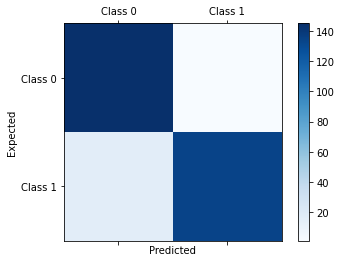

In [31]:
#confusion matrix w/ sample of dataset
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

my_confusion_matrix = confusion_matrix(y_expected,y_pred.round())
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

[[282845   1470]
 [    46    446]]


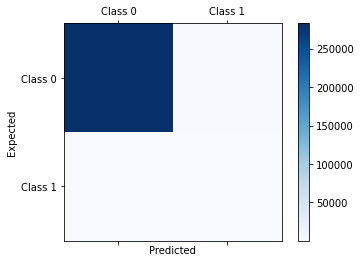

In [32]:
#confusion matrix on entire dataset 
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

my_confusion_matrix = confusion_matrix(y_expected,y_pred.round())
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Apply SMOTE

In [33]:
!pip install -U imbalanced-learn

In [34]:
from imblearn.over_sampling import SMOTE

#find X,y variables, oversampling now
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [35]:
#split datasets
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [36]:
# transform data into numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [37]:
# train model again, notice faster time since less data used
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 52s 2ms/step - loss: 0.0293 - accuracy: 0.9903
Epoch 2/5
26537/26537 [==============================] - 51s 2ms/step - loss: 0.0130 - accuracy: 0.9965
Epoch 3/5
26537/26537 [==============================] - 51s 2ms/step - loss: 0.0101 - accuracy: 0.9974
Epoch 4/5
26537/26537 [==============================] - 51s 2ms/step - loss: 0.0093 - accuracy: 0.9978
Epoch 5/5
26537/26537 [==============================] - 51s 2ms/step - loss: 0.0080 - accuracy: 0.9981


[[85081   172]
 [  143 85193]]


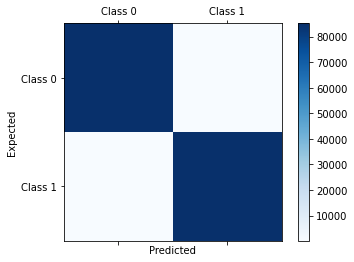

In [38]:
from matplotlib import pyplot as plt

#confusion matrix w/ sample of dataset
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

my_confusion_matrix = confusion_matrix(y_expected,y_pred.round())
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

[[283784    531]
 [     3    489]]


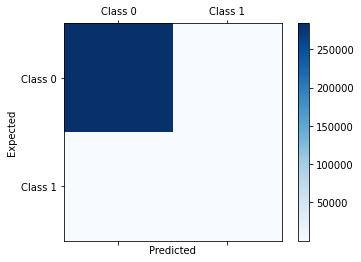

In [39]:
from matplotlib import pyplot as plt

#confusion matrix on entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

my_confusion_matrix = confusion_matrix(y_expected,y_pred.round())
print(my_confusion_matrix)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(my_confusion_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

0 - non fraudulent
1 - fraudulent
<p> BackPropogation (feed forward -> compare prediction with expected output -> calc error -> Back propogate -> update weights -> iterate) <p>
<p>Define number of epochs and batch size , split data into train, validation, test split.<p>
<p> Using dropout layers to turn off some layers during learning, must define prob that layer will get turned off, helps with overfitting. <p>

*Metrics*
<p>True positives will be import to find as it shows how many predictions of fradulent transactions were correct as well as true negatives.. Also important that False Negatives be as low as possible as these are the transactions that slip by which are fraudulent. While False positives will leave us with unsatisfied customers since they are predicted as fraudulent users. <p>
<p>*Accuracy = (TP + TN) / TOTAL<p>
<p>Precision = TP / (TP + FP)<p>
<p>Precision = TN / (FP + TN)<p>
<p>*recall = TP / (TP + FN)<p>

*Models*

<p>SVM: finds best line, best line is one that maximizes dist from line to points of each class, it finds the best hyperplane<p>
<p>Decision trees: used in classification problems and regression problems, tree is built recursively using cost functions to find best splits at each node, once tree is built you can use it to find predictions, pruning is used to avoid overfitting<p>
<p>Random Forest: using multiple decision trees at once, <p>
<p>K-nearest Neighbours: gives prediction based on K nearest points, A number K is selected, K items that are closer to the new sample are selected, finds the most frequent class among K items, Prediction is most frequent class <p>

*Sampling*

<p>unbalanced dataset so must apply sampling techniques.<p>
<p>Undersampling: lose data to have even dataset  <p>
<p>Oversampling: duplicate existing datapoints for lower datatype, like SMOTE. Creates a new vector and fits new points into vector. <p>

